In [16]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib.colors import LinearSegmentedColormap

%matplotlib inline
import numpy as np
import os
import pandas as pd
import seaborn as sns
import scipy


sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")

import visualization_functions as vis


figures_folder = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/figures/"



# col1 = "#f93c3c"
# col2 = "#009a7f"
# col3 = "#9fa8ab"
# col5 = "#00490c"
# col4 = "#f4d895"

col1 = "#f34236"
col2 = "#d6c571"
col3 = "#88bc67"
col4 = "#2e8174"
col5 = "#143969"
my_cmap = my_cmap = LinearSegmentedColormap.from_list('custom blue', [col5, col4, col2,col1], N=256)


wt_lfc = "WT Log2 Fold Change"
mut_lfc = "9C1 Log2 Fold Change"

data_folder = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/"\
              "/tables"
de_hi_side = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/"\
           "tables/2018-06-28-wt-bh-0-30.csv"
    
de_9c1_side="/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/"\
          "tables/2018-06-28-wt-b9-0-30.csv"

    
counts_file = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/"\
            "data/counts/stranded/2018-04-23_counts.csv"
    
rpkm_file = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/"\
            "data/counts/stranded/2018-04-23_rpkm.csv"
    
study_design_file = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/"\
                    "data/ref/study_design.csv"

figures_folder = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/figures/"


rpkms = pd.read_csv(rpkm_file, index_col=0)
rpkms.columns = [c.split("_")[0] for c in rpkms.columns]

meta = pd.read_csv(study_design_file, index_col=0)
meta.index = [i.split("S")[1] for i in meta.index]


rpkms = pd.read_csv(rpkm_file, index_col=0)
rpkms.columns = [c.split("_")[0] for c in rpkms.columns]

meta = pd.read_csv(study_design_file, index_col=0)
meta.index = [i.split("S")[1] for i in meta.index]


wt = "WT"
mut = "9C1"

mut_L = "Dienes Line"
wt_L = "Merge"

bh_mut = "Behind Dienes Line"
bh_wt = "Behind Merge Front"

thirty = "30 min"
zero = "0 min"

samples = {"Case5":"{} | {}".format(wt_L, thirty),
           "Case6":"{} | {}".format(wt_L, zero),
            "Case7":"{} | {} | {}".format(wt, bh_mut, thirty), 
          "Case8":"{} | {} | {}".format(mut, bh_mut, thirty),
          "Case9": "{} | {}".format(mut_L, zero),
          "Case10": "{} | {}".format(mut_L, thirty),
          "Case11": "{} | {} | {}".format(mut, bh_mut, zero),
           "Case12":"{} | {} | {}".format(wt, bh_mut, zero),
          "Case13": "{} | {} | {}".format(wt, bh_wt,zero ),
           "Case14":"{} | {} | {}".format(wt, bh_wt, thirty)}
meta = meta[meta["lane.ID"]!="L1"]
rpkms = rpkms[meta.index]
rpkms_norm =  rpkms.apply(vis.invnorm)
meta["samples"] = [samples[i] for i in meta["group.ID"]]
meta["time.point"] = meta["time.point"].str.replace("0''", "0 min")
meta["time.point"] = meta["time.point"].str.replace("4'", "4 hrs")
meta['position'] = meta['position'].map({'B': "{}|{}".format(wt, bh_wt),
                                        "BH": "{}|{}".format(wt, bh_mut),
                                        "B9":"{}|{}".format(mut, bh_mut),
                                        "L-HI":wt_L,
                                        "L-9C": mut_L})

In [6]:
de_mut= pd.read_csv(de_9c1_side, index_col=0)
de_wt= pd.read_csv(de_hi_side, index_col=0)
both = set.intersection(set(de_mut.index), set(de_wt.index))
mut_only = set(de_mut.index) - set(de_wt.index)
wt_only = set(de_wt.index)- set(de_mut.index) 

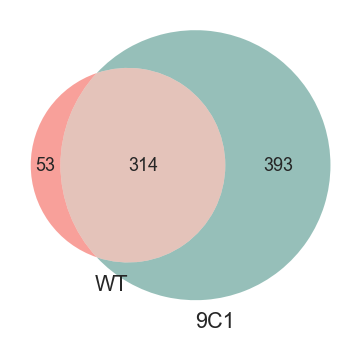

In [11]:
###
fig = plt.figure(figsize = (6,6))
venn2([set(de_wt.index), set(de_mut.index)], set_labels =(wt, mut), set_colors=(col1, col4), alpha=0.5,
     normalize_to=2.0)
plt.show()


In [12]:
de_wt_up = de_wt[de_wt.log2FoldChange > 0]
de_mut_up = de_mut[de_mut.log2FoldChange > 0]
de_wt_down = de_wt[de_wt.log2FoldChange < 0]
de_mut_down= de_mut[de_mut.log2FoldChange < 0]

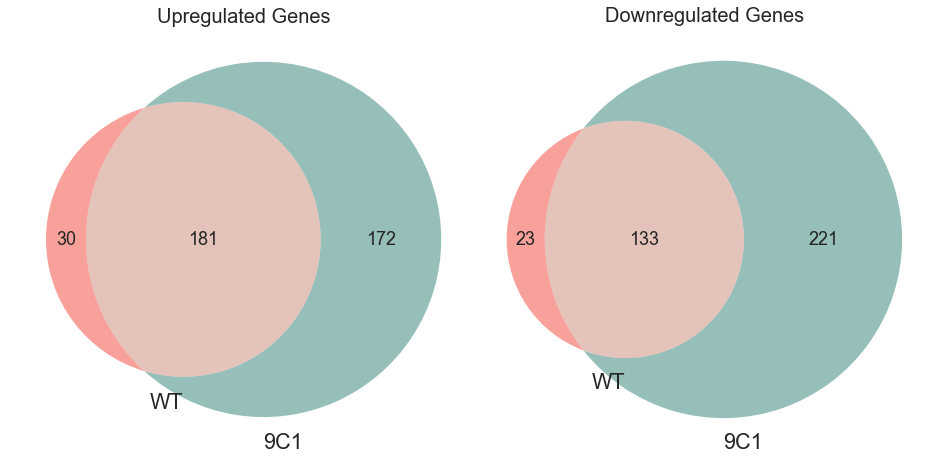

In [13]:
###
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_axes([0.1, 0.5, 0.8, 1.2],
                    xticklabels=[])
venn2([set(de_wt_up.index), set(de_mut_up.index)], set_labels =(wt, mut), set_colors=(col1, col4), alpha=0.5,
     normalize_to=1.0)
ax1.set_title("Upregulated Genes", fontsize=20)

ax2 = fig.add_axes([0.9, 0.5, 0.8, 1.2])
ax2.set_title("Downregulated Genes", fontsize=20)
venn2([set(de_wt_down.index), set(de_mut_down.index)], set_labels =(wt, mut), set_colors=(col1, col4), alpha=0.5,
     normalize_to=1.0)
fig.savefig(os.path.join(figures_folder, "2018-07-02-proteus_rnaseq_figure_6a.png"), dpi=300, bbox_inches="tight")

In [13]:
###
both_file = os.path.join(data_folder, "de_genes_behind_line_both_WT_and_9C1.txt")
mutant_file = os.path.join(data_folder, "de_genes_behind_line_9C1_only.txt")
wt_file = os.path.join(data_folder, "de_genes_behind_line_WT_only.txt")
with open(both_file, "w") as of:
    for gene in both:
        of.write("{}\n".format(gene))
with open(mutant_file, "w") as of:
    for gene in mut_only:
        of.write("{}\n".format(gene))
with open(wt_file, "w") as of:
    for gene in wt_only:
        of.write("{}\n".format(gene))
# run keggAPI on these to get gene info


In [14]:
# Looking at common patterns of gene expression

df1 = de_wt.loc[both][["baseMean", "log2FoldChange", "padj"]]
df1.rename(index=str, columns={"baseMean": "{} Mean Expression".format(wt), 
                               "log2FoldChange": wt_lfc,
                              "padj": "{} padj".format(wt)}, inplace=True)

df2 = de_mut.loc[both][["baseMean", "log2FoldChange", "padj"]]
df2.rename(index=str, columns={"baseMean": "{} Mean Expression".format(mut),
                               "log2FoldChange": mut_lfc,
                              "padj": "{} padj".format(mut)}, inplace=True)
df = df1.merge(df2, left_index=True, right_index=True)


In [17]:
# NEEDS TO BE FIXED


#gene_info_file = os.path.join(data_folder, "de_genes_behind_line_both_WT_and_9C1_info.tab")
#gene_info = pd.read_csv(gene_info_file, sep="\t", header=None, index_col=0,
                        names=["gene_name", "function", "pathway"])
#fx = gene_info.function
#fx = fx.str.replace("\(GenBank\)", "")
#gene_info.function = fx

df_up = df[(df[wt_lfc]>0) | (df[mut_lfc] >0)]
df_up = df_up.merge(gene_info, how="left", left_index=True, right_index=True).sort_index()
df_up = vis.remove_hypotheticals(df_up)
#df_up.to_excel(os.path.join(data_folder, "COMMON_UP_CHANGES_IN_GENE_EXPRESSION_BEHIND_THE_DIENES_LINE.xlsx"))

df_down = df[(df[wt_lfc]<0) | (df[mut_lfc] <0)]
df_down = df_down.merge(gene_info, how="left", left_index=True, right_index=True).sort_index()
df_down = vis.remove_hypotheticals(df_down)
#df_down.to_excel(os.path.join(data_folder, "COMMON_DOWN_CHANGES_IN_GENE_EXPRESSION_BEHIND_THE_DIENES_LINE.xlsx"))


IndentationError: unexpected indent (<ipython-input-17-1917a7eda149>, line 3)

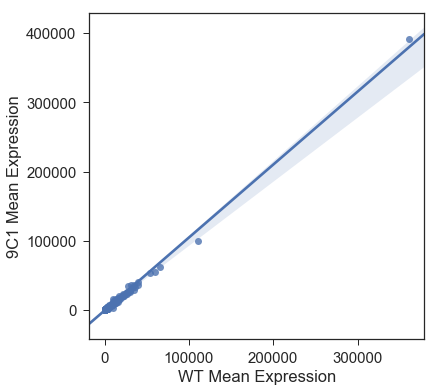

In [102]:
###
fig = plt.figure(figsize = (6,6))
s = sns.regplot("{} Mean Expression".format(wt), "{} Mean Expression".format(mut), df)
s

NameError: name 'df_up' is not defined

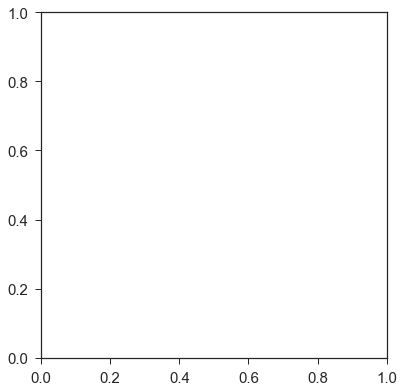

In [18]:
###
fig = plt.figure(figsize = (6,6))

ax1 = fig.add_axes([1.2, 0.5, 0.8, 0.8],)
s = sns.regplot(wt_lfc, mut_lfc, df_up, color=col2, fit_reg=False);
plt.plot([0,5], [0, 5], color=col3, linestyle='--', linewidth=2)
s.set(xlim=[0,5], ylim=[0,5],);

ax2 = fig.add_axes([0.1, 0.5, 0.8, 0.8],)
s = sns.regplot(wt_lfc, mut_lfc, df_down, color=col2, fit_reg=False);
plt.plot([-4,0], [-4,0], color=col3, linestyle='--', linewidth=2)
s.set(xlim=[-4,0], ylim=[-4,0],);
s.set_yticks( [-4, -3, -2, -1,0]);
s.set_yticklabels([-4, -3, -2, -1,0]);

fig.savefig(os.path.join(figures_folder, "proteus_rnaseq_figure_4b.png"), dpi=300, bbox_inches="tight")

In [6]:
fimbrial = vis.get_subset_genes(df_up, "fimbria", [wt_lfc, mut_lfc])
biotin = vis.get_subset_genes(df_up, "iotin", [wt_lfc, mut_lfc],"pathway")
zap = vis.get_subset_genes(df_up, "zap", [wt_lfc, mut_lfc],"gene_name")
glutamate = vis.get_subset_genes(df_up, "glutamate", [wt_lfc, mut_lfc])
stress = vis.get_subset_genes(df_up, "stress",[wt_lfc, mut_lfc])
pp = vis.get_subset_genes(df_up, "peptide", [wt_lfc, mut_lfc], "function")

#-------------------------------------------------------------------------
ribosome = vis.get_subset_genes(df_down, "ribosom",[wt_lfc, mut_lfc] )
TonB = vis.get_subset_genes( df_down, "TonB",[wt_lfc, mut_lfc])
purine = vis.get_subset_genes( df_down, "Purine", [wt_lfc, mut_lfc],"pathway")
#-------------------------------------------------------------------------
t6ss_operon_1 = ["PMI1117", "PMI1118", "PMI1119", "PMI1120", "PMI1121"]
t6ss_operon_2 = ["PMI2990", "PMI2991", "PMI2992", "PMI2993", "PMI2994", "PMI2995", "PMI2996"]
orphans = ["PMI0173", "PMI0174", "PMI0175", "PMI0176"]


In [7]:
up = {"T1SS":zap, "Glutamate Metabolism":glutamate, 
      "Biotin Synthesis":biotin, "Stress proteins":stress, "Fimbria":fimbrial, 
      "Oligo/Dipeptide importers":pp}
down = {     
      "Ribosomal Proteins":ribosome, "Purine Metabolism":purine, "TonB-dependent Receptors":TonB
     }




,WT|Behind Dienes Line|0 min,WT|Behind Dienes Line|30 min,9C1|Behind Dienes Line|0 min,9C1|Behind Dienes Line|30 min
T1SS,2903.002500,11017.962500,2644.472500,13021.135000
Glutamate Metabolism,163.913333,605.031667,62.555000,610.385000
Biotin Synthesis,11.824000,48.122000,10.036000,54.104000
Stress proteins,53.052500,157.545000,36.965000,185.072500
Fimbria,93.529231,295.096923,28.723846,99.946154
Oligo/Dipeptide importers,312.026667,1020.420000,176.948333,1050.440000


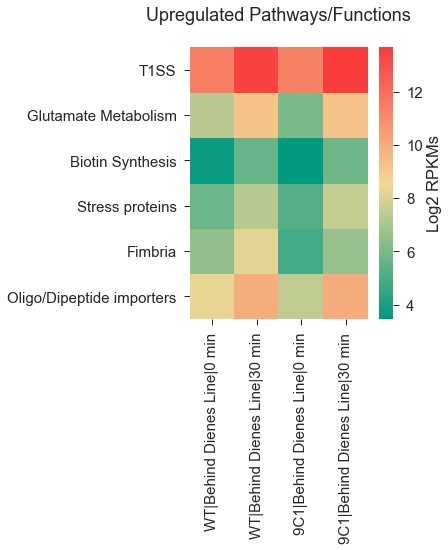

In [11]:
df = vis.join_subset_means(up, meta, rpkms, samples, my_cmap)
fig = plt.figure(figsize=(4,5))   
s = sns.heatmap(np.log2(df+1),cmap = my_cmap,cbar_kws={'label': 'Log2 RPKMs'});
s.set_title("Upregulated Pathways/Functions\n")
fig.savefig(os.path.join(figures_folder, "2018-05-23-proteus_rnaseq_figure_4c.png"), dpi=300, bbox_inches="tight")

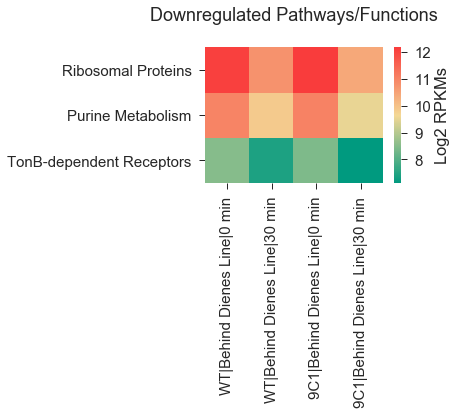

In [12]:
df = vis.join_subset_means(down, meta, rpkms, samples, my_cmap)
fig = plt.figure(figsize=(4,2.5))   
s = sns.heatmap(np.log2(df+1),cmap = my_cmap,cbar_kws={'label': 'Log2 RPKMs'});
s.set_title("Downregulated Pathways/Functions\n")
fig.savefig(os.path.join(figures_folder, "2018-05-23-proteus_rnaseq_figure_4d.png"), dpi=300, bbox_inches="tight")


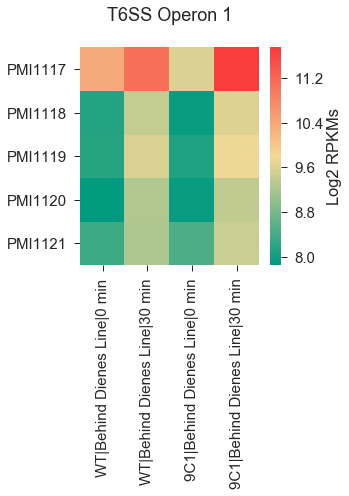

In [16]:
fig = vis.draw_heatmap_of_subset(t6ss_operon_1, meta,"T6SS Operon 1\n",
                          rpkms, samples, my_cmap, (4,4))
fig.savefig(os.path.join(figures_folder, "2018-05-23-proteus_rnaseq_figure_4e.png"), dpi=300, bbox_inches="tight")

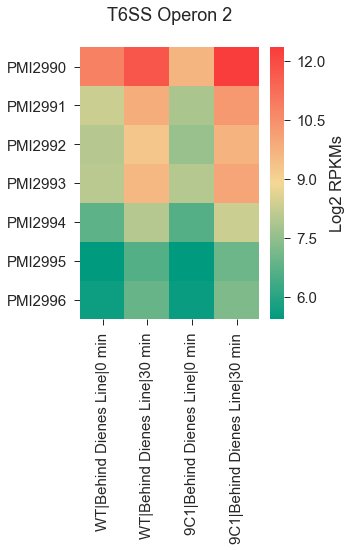

In [17]:
fig = vis.draw_heatmap_of_subset(t6ss_operon_2, meta,"T6SS Operon 2\n",
                          rpkms, samples, my_cmap, (4,5))
fig.savefig(os.path.join(figures_folder, "2018-05-23-proteus_rnaseq_figure_4f.png"), dpi=300, bbox_inches="tight")


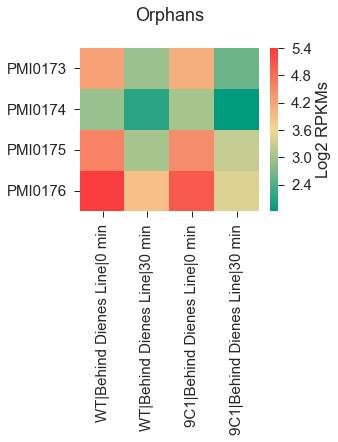

In [18]:
fig = vis.draw_heatmap_of_subset(orphans, meta,"Orphans\n",
                          rpkms, samples, my_cmap, (4,3))
fig.savefig(os.path.join(figures_folder, "2018-05-23-proteus_rnaseq_figure_4g.png"), dpi=300, bbox_inches="tight")


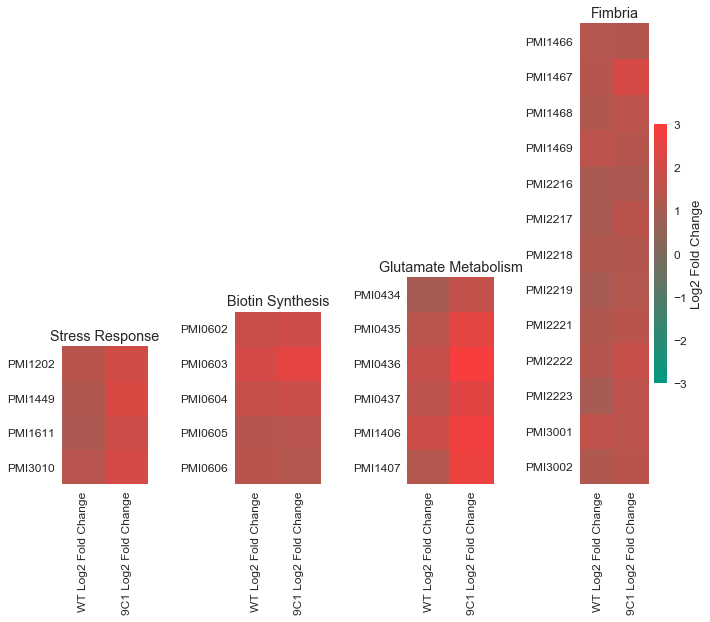

In [55]:
###
fig = plt.figure(figsize=(2,8))
sns.set(font_scale=1.2)
ax1 = fig.add_axes([3.7, 0.5, 0.6, 0.8],)
sns.heatmap(fimbrial, vmin = -3, vmax = 3,cmap = my_cmap,center = 0, cbar_kws = {'use_gridspec':True,'location':"right",
                                  'label': 'Log2 Fold Change',});
ax1.set_title("Fimbria")
ax2 = fig.add_axes([1.3, 0.5, 0.6, 0.3],)

sns.heatmap(biotin, vmin = -3, vmax = 3,cmap = my_cmap,center = 0, cbar=False);
ax2.set_title("Biotin Synthesis")
ax3 = fig.add_axes([2.5, 0.5, 0.6, 0.36],)

sns.heatmap(glutamate, vmin = -3, vmax = 3,cmap = my_cmap,center = 0, cbar=False);
ax3.set_title("Glutamate Metabolism")
ax4 = fig.add_axes([0.1, 0.5, 0.6, 0.24],)
sns.heatmap(stress, vmin = -3, vmax = 3,cmap = my_cmap,center = 0, cbar=False);
ax4.set_title("Stress Response")
fig.savefig(os.path.join(figures_folder, "proteus_rnaseq_figure_4c.png"), dpi=300, bbox_inches="tight")

,WT Log2 Fold Change,9C1 Log2 Fold Change
PMI0138,-1.090813,-1.283089
PMI0160,-1.136317,-1.366283
PMI0366,-1.230212,-1.256697
PMI2181,-1.250053,-1.921775
PMI3280,-1.183204,-1.568150


pandas.core.series.Series

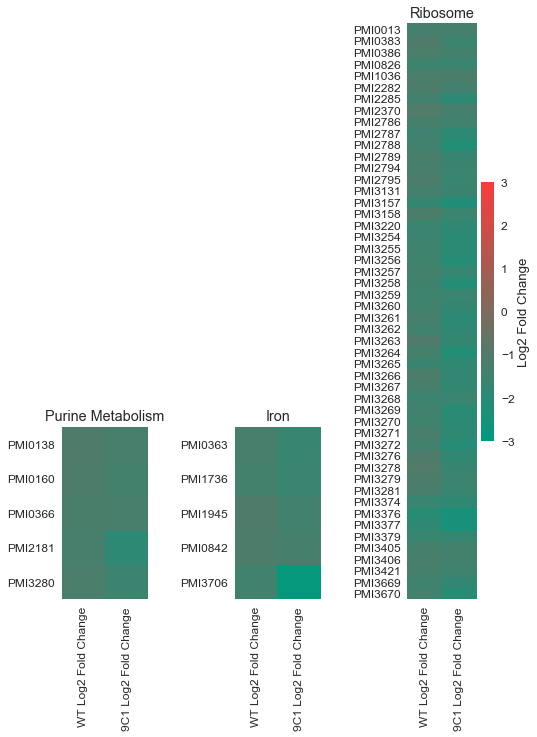

In [56]:
my_cmap = LinearSegmentedColormap.from_list('custom blue', [col2, col1], N=256)
fig = plt.figure(figsize=(2,8))
sns.set(font_scale=1.2)
ax1 = fig.add_axes([2.5, 0.5, 0.6, 1],)
sns.heatmap(ribosome, vmin = -3, vmax = 3,cmap = my_cmap,center = 0, cbar_kws = {'use_gridspec':True,'location':"right",
                                  'label': 'Log2 Fold Change',});
ax1.set_title("Ribosome")

ax2 = fig.add_axes([1.3, 0.5, 0.6, 0.3],)
sns.heatmap(iron, vmin = -3, vmax = 3,cmap = my_cmap,center = 0, cbar=False);
ax2.set_title("Iron")

ax4 = fig.add_axes([0.1, 0.5, 0.6, 0.3],)
sns.heatmap(purine, vmin = -3, vmax = 3,cmap = my_cmap,center = 0, cbar=False);
ax4.set_title("Purine Metabolism")
fig.savefig(os.path.join(figures_folder, "proteus_rnaseq_figure_4d.png"), dpi=300, bbox_inches="tight")

In [29]:
df3 = df3.sort_values("log2FoldChange", ascending=False)
df3

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
PMI2990,15808.158995,2.485689,0.327984,7.578684,3.490785e-14,4.837422e-12
PMI2659,890.245325,2.446922,0.365521,6.694336,2.166532e-11,1.530591e-09
PMI3343,1199.071422,2.307460,0.458517,5.032444,4.842650e-07,8.348358e-06
PMI1006,3116.108955,2.245087,0.409768,5.478919,4.279310e-08,1.109234e-06
PMI1390,276.490251,2.173738,0.346134,6.280054,3.384550e-10,1.816643e-08
PMI2931,267.995834,2.110744,0.396987,5.316910,1.055442e-07,2.462396e-06
PMI3093,1394.266270,2.104387,0.294752,7.139509,9.366495e-13,8.797580e-11
PMI1592,6270.640770,2.051703,0.501668,4.089762,4.318154e-05,3.449736e-04
PMI2203,749.043260,2.011061,0.330208,6.090287,1.127082e-09,5.076097e-08
PMI0360,1606.921641,1.997442,0.433899,4.603476,4.154964e-06,5.006802e-05


In [44]:
# Looking at WT alone

wt_info_file = os.path.join(data_folder, "de_genes_behind_line_WT_only_info.tab")

wt_info = pd.read_csv(wt_info_file, sep="\t", header=None, index_col=0,
                        names=["gene_name", "function", "pathway"])

wt_info = wt_info[2:]
fx = wt_info.function
fx = fx.str.replace("\(GenBank\)", "")
wt_info.function = fx

wt_info
wt_de_only = de_wt.loc[wt_only]
wt_de_only.rename(index=str, columns={"baseMean": "{} Mean Expression".format(wt), 
                               "log2FoldChange": wt_lfc,
                                     }, inplace=True)
wt_de_only = wt_de_only[[wt_lfc,"padj"]]
wt_de_only = wt_de_only.merge(wt_info, how="left", left_index=True, right_index=True).sort_index()
wt_de_only = remove_hypotheticals(wt_de_only)
wt_de_only
wt_de_only.to_excel(os.path.join(data_folder, "WT_SPECIFIC_CHANGES_IN_GENE_EXPRESSION_BEHIND_THE_DIENES_LINE.xlsx"))

# Look at tellurite and cys operon

In [45]:
# Tellurite
ter = get_subset_genes(wt_de_only, "tellurite", col_return=["gene_name",wt_lfc])
ter

dline_meta = meta[meta["group.ID"].isin(["Case7", "Case8", "Case11", "Case12"])]
dline_meta
ter_rpkms = dline_meta.merge(rpkms.loc[ter.index][dline_meta.index].T, left_index=True, right_index=True)
operon_means = {}
for gene in ter.index:
    operon_means[gene] = {}
    for case in ter_rpkms["group.ID"].unique():
        m = round(ter_rpkms[ter_rpkms["group.ID"] == case][gene].mean(),2)
        operon_means[gene][case] = m
t = pd.DataFrame(operon_means).T
t = t[["Case12", "Case7", "Case11", "Case8"]]
t.rename(index=str, columns={c:samples[c] for c in  t.columns}, inplace=True)
t

,WT|Behind Dienes Line|0 min,WT|Behind Dienes Line|30 min,9C1|Behind Dienes Line|0 min,9C1|Behind Dienes Line|30 min
PMI2384,491.92,1115.08,831.52,1153.03
PMI2385,382.75,967.53,676.80,1020.99
PMI2386,217.34,591.80,387.49,542.00
PMI2387,147.75,458.50,298.51,442.11
PMI2388,346.74,877.24,650.40,1071.68


,WT|Behind Dienes Line|0 min,WT|Behind Dienes Line|30 min,9C1|Behind Dienes Line|0 min,9C1|Behind Dienes Line|30 min
PMI2384,491.92,1115.08,831.52,1153.03
PMI2385,382.75,967.53,676.80,1020.99
PMI2386,217.34,591.80,387.49,542.00
PMI2387,147.75,458.50,298.51,442.11
PMI2388,346.74,877.24,650.40,1071.68


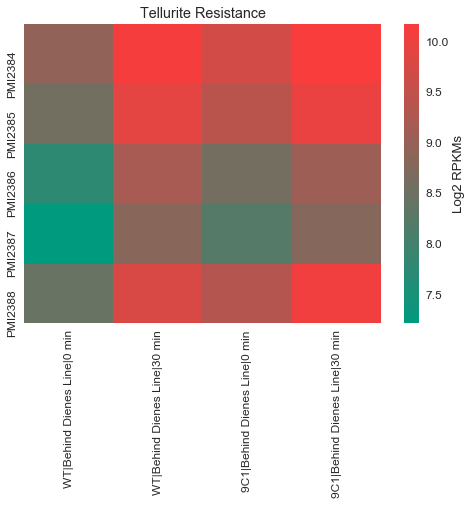

In [50]:
draw_heatmap_of_subset(ter, meta, "Tellurite Resistance")

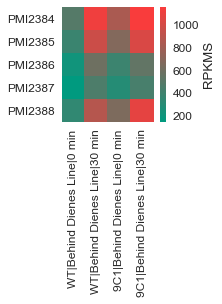

In [46]:
my_cmap = LinearSegmentedColormap.from_list('custom blue', [col2, col1], N=256)
fig = plt.figure(figsize=(2,8))
sns.set(font_scale=1.2)
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.2],)
sns.heatmap(t,cmap = my_cmap, cbar_kws = {'use_gridspec':True,'location':"right",
                                  'label': 'RPKMS',});

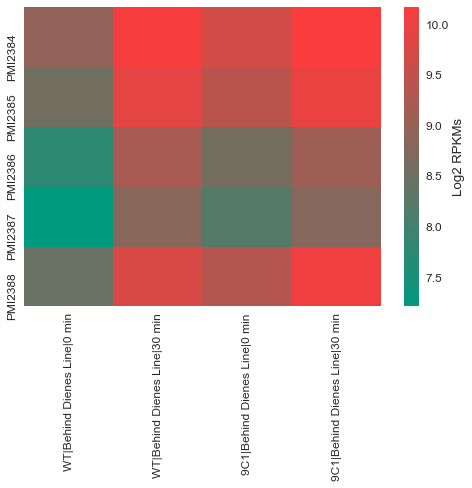

In [49]:
fig2 = plt.figure()
#ax1 = fig2.add_axes([0.1, 0.5, 0.8, 0.2],)
sns.heatmap(np.log2(t+1),cmap = my_cmap, cbar_kws = {'use_gridspec':True,"label":"Log2 RPKMs"});


In [145]:
rpkms.loc[ter.index][dline_meta.index].T

,PMI2384,PMI2385,PMI2386,PMI2387,PMI2388
76073,942.44,712.82,478.03,322.53,800.21
76074,1301.85,1115.99,674.43,588.67,981.26
76075,1100.96,1073.78,622.95,464.30,850.26
76076,1206.13,1079.76,537.30,428.22,1403.33
76077,1338.09,955.42,582.91,481.09,1132.72
76078,914.88,1027.79,505.78,417.03,678.99
76085,728.46,565.36,328.88,246.40,541.41
76086,781.29,600.76,311.43,243.72,550.81
76087,984.81,864.28,522.16,405.42,858.98
76088,564.89,457.24,244.50,169.73,389.53


In [80]:
# Looking at 9C1 alone

# Looking at WT alone

mut_info_file = os.path.join(data_folder, "de_genes_behind_line_9C1_only_info.tab")

mut_info = pd.read_csv(mut_info_file, sep="\t", header=None, index_col=0,
                        names=["N", "gene_name", "function", "pathway"])

fx = mut_info.function
fx = fx.str.replace("\(GenBank\)", "")
mut_info.function = fx
mut_info
mut_de_only = de_mut.loc[mut_only]
mut_de_only.rename(index=str, columns={"baseMean": "{} Mean Expression".format(mut), 
                               "log2FoldChange": mut_lfc,
                                     }, inplace=True)
mut_de_only = mut_de_only[[mut_lfc,"padj"]]
mut_de_only = mut_de_only.merge(mut_info, how="left", left_index=True, right_index=True).sort_index()
mut_de_only = remove_hypotheticals(mut_de_only)
mut_de_only_up = mut_de_only[mut_de_only[mut_lfc] > 0]
mut_de_only_down = mut_de_only[mut_de_only[mut_lfc] < 0]
mut_de_only_down
mut_de_only_up.to_excel(os.path.join(data_folder, "9C1_UP_CHANGES_IN_GENE_EXPRESSION_BEHIND_THE_DIENES_LINE.xlsx"))
mut_de_only_down.to_excel(os.path.join(data_folder, "9C1_DOWN_CHANGES_IN_GENE_EXPRESSION_BEHIND_THE_DIENES_LINE.xlsx"))

#Look at mre rod flagella

